In [1]:
from awpy import Demo

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from joblib import load, dump
import random
import sys
import os

pd.set_option('display.max_columns', 100)
sys.path.append(os.path.abspath('./package'))

from CS2_tabular_snapshots import CS2_TabularSnapshots
from CS2_token import CS2_Token
from CS2_map import CS2_Map
from CS2_dictionary import CS2_Dictionary
from CS2_graph_snapshots import CS2_GraphSnapshots


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\szmid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\szmid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\traitlets\config\application.py", line 1075, in launch

### ***awpy2*** test

In [2]:
player_cols = [
    'X',
    'Y',
    'Z',
    'health',
    'score',
    'mvps',
    'is_alive',
    'balance',
    'inventory',
    'life_state',
    'pitch',
    'yaw',
    'armor',
    'has_defuser',
    'has_helmet',
    'player_name',
    'start_balance',
    'total_cash_spent',
    'cash_spent_this_round',
    'move_collide',
    'move_type',
    'team_num',
    'jump_velo',
    'fall_velo',
    'in_crouch',
    'crouch_state',
    'ducked',
    'ducking',
    'in_duck_jump',
    'spotted',
    'approximate_spotted_by',
    'time_last_injury',
    'player_state',
    'passive_items',
    'is_scoped',
    'is_walking',
    'resume_zoom',
    'is_defusing',
    'in_bomb_zone',
    'is_strafing',
    'move_state',
    'which_bomb_zone',
    'in_hostage_rescue_zone',
    'stamina',
    'direction',
    'armor_value',
    'velo_modifier',
    'flash_duration',
    'flash_max_alpha',
    'round_start_equip_value',
    'current_equip_value',
    'velocity',
    'velocity_X',
    'velocity_Y',
    'velocity_Z',
    'FIRE',
    'USE'
]
other_cols = [
    'num_player_alive_ct',
    'num_player_alive_t',
    'ct_losing_streak',
    't_losing_streak',
    'active_weapon_name',
    'active_weapon_ammo',
    'total_ammo_left',
    'is_in_reload',
    'alive_time_total',
    'is_bomb_dropped'
]

dem = Demo(path='../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-faze-vs-vitality-bo3-lQLvdLlJcL7dI4fNDLSZOXfaze-vs-vitality-m1-inferno.dem', \
           player_props=player_cols, other_props=other_cols)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/inferno_graph/graph_models/manual/nodes_v1_5.csv'

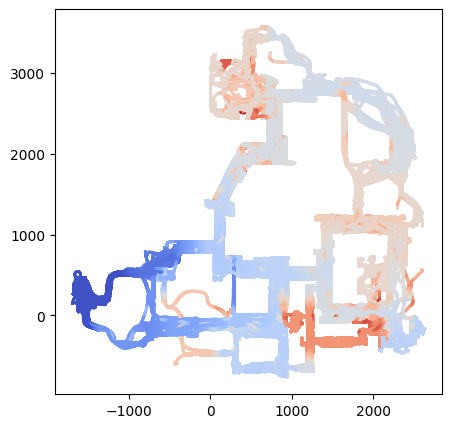

In [3]:
plt.figure(figsize=(5, 5))
plt.scatter(dem.ticks['X'], dem.ticks['Y'], c=dem.ticks['Z'], cmap='coolwarm', s=1)
nodes = pd.read_csv('../../data/inferno_graph/graph_models/manual/nodes_v1_5.csv')
plt.scatter(nodes['x'], nodes['y'], c='black', s=1)

### Graph creator test

In [5]:
# Map nodes dataset
nodes = pd.read_csv('../../data/map_graph_model/de_inferno/nodes.csv')
edges = pd.read_csv('../../data/map_graph_model/de_inferno/edges.csv')

# Create tabular snapshot object
tc = CS2_TabularSnapshots()

# Create tabular snapshot database
df, df_dict = tc.process_match(
    match_path='../../data/matches-raw/cs2/2024/_iem-chengdu-2024-wildcard-vs-virtuspro-inferno-norx8DdKJD9R1hFM8pob5fwildcard-vs-virtus-pro-inferno.dem',
    player_stats_data_path='../../data/player-stats/scraped-in-2024/2022/norm_imputed_player_stats_2022_utf.csv',
    missing_player_stats_data_path='../../data/player-stats/missing_players_df.csv',
    weapon_data_path='../../data/weapon_info/ammo_info.csv',

    ticks_per_second=4,
    numerical_match_id=1000,
    num_permutations_per_round=1,
    build_dictionary=True
)

# Impute missing values
df = tc.impute_match(df)

# Tokenize match
tokenizer = CS2_Token()
df = tokenizer.tokenize_match(df, 'de_inferno', nodes)

df.head(5)

,CT0_name,CT0_X,CT0_Y,CT0_Z,CT0_pitch,CT0_yaw,CT0_velocity_X,CT0_velocity_Y,CT0_velocity_Z,CT0_health,CT0_armor_value,CT0_active_weapon_magazine_size,CT0_active_weapon_ammo,CT0_active_weapon_magazine_ammo_left_%,CT0_active_weapon_max_ammo,CT0_total_ammo_left,CT0_active_weapon_total_ammo_left_%,CT0_flash_duration,CT0_balance,CT0_current_equip_value,CT0_round_start_equip_value,CT0_is_alive,CT0_is_CT,CT0_is_shooting,CT0_is_crouching,CT0_is_ducking,CT0_is_duck_jumping,CT0_is_walking,CT0_is_spotted,CT0_is_scoped,CT0_is_defusing,CT0_is_reloading,CT0_is_in_bombsite,CT0_stat_kills,CT0_stat_HS_kills,CT0_stat_opening_kills,CT0_stat_deaths,CT0_stat_opening_deaths,CT0_stat_assists,CT0_stat_flash_assists,CT0_stat_damage,CT0_stat_weapon_damage,CT0_stat_nade_damage,CT0_stat_survives,CT0_stat_KPR,CT0_stat_ADR,CT0_stat_DPR,CT0_stat_HS%,CT0_stat_SPR,CT0_inventory_C4,...,T9_hltv_opening_kill_rating,T9_hltv_team_W%_after_opening,T9_hltv_opening_kill_in_W_rounds,T9_hltv_rating_1.0_all_Career,T9_hltv_clutches_1on1_ratio,T9_hltv_clutches_won_1on1,T9_hltv_clutches_won_1on2,T9_hltv_clutches_won_1on3,T9_hltv_clutches_won_1on4,T9_hltv_clutches_won_1on5,NUMERICAL_MATCH_ID,MATCH_ID,UNIVERSAL_tick,UNIVERSAL_round,UNIVERSAL_time,UNIVERSAL_remaining_time,UNIVERSAL_freeze_end,UNIVERSAL_end,UNIVERSAL_CT_wins,UNIVERSAL_CT_score,UNIVERSAL_T_score,UNIVERSAL_CT_alive_num,UNIVERSAL_T_alive_num,UNIVERSAL_CT_total_hp,UNIVERSAL_T_total_hp,UNIVERSAL_CT_equipment_value,UNIVERSAL_T_equipment_value,UNIVERSAL_CT_losing_streak,UNIVERSAL_T_losing_streak,UNIVERSAL_is_bomb_dropped,UNIVERSAL_is_bomb_being_planted,UNIVERSAL_is_bomb_being_defused,UNIVERSAL_is_bomb_defused,UNIVERSAL_is_bomb_planted_at_A_site,UNIVERSAL_is_bomb_planted_at_B_site,UNIVERSAL_bomb_X,UNIVERSAL_bomb_Y,UNIVERSAL_bomb_Z,UNIVERSAL_bomb_mx_pos1,UNIVERSAL_bomb_mx_pos2,UNIVERSAL_bomb_mx_pos3,UNIVERSAL_bomb_mx_pos4,UNIVERSAL_bomb_mx_pos5,UNIVERSAL_bomb_mx_pos6,UNIVERSAL_bomb_mx_pos7,UNIVERSAL_bomb_mx_pos8,UNIVERSAL_bomb_mx_pos9,UNIVERSAL_smokes_active,UNIVERSAL_infernos_active,TOKEN
0,fame,2353.000000,1977.000000,135.518890,6.993835,-95.568008,0.000000,0.000000,0.000000,100,100,0,0.0,0.0,0,1.0,0.0,0.0,150,850,200,True,1,False,0,0,0,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0,...,0.54321,0.857,0.444444,0.571429,1.0,0.064103,0.133333,0.153846,0.0,0.0,1000,../../data/matches-raw/cs2/2024/_iem-chengdu-2...,1263,1,115.00,115.00,1263,6403,1,0,0,5,5,500,500,4600,5000,1,1,False,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,[],[],0000000050000000000000000000000000000000000000...
1,fame,2350.104736,1947.279297,135.539261,6.993835,-95.568008,-0.281738,-2.892334,0.001312,100,100,0,0.0,0.0,0,1.0,0.0,0.0,150,850,200,True,1,False,0,0,0,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0,...,0.54321,0.857,0.444444,0.571429,1.0,0.064103,0.133333,0.153846,0.0,0.0,1000,../../data/matches-raw/cs2/2024/_iem-chengdu-2...,1279,1,114.75,114.75,1263,6403,1,0,0,5,5,500,500,4600,5000,1,1,False,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,[],[],0000000050000000000000000000000000000000000000...
2,fame,2344.702148,1890.890381,136.600327,6.630936,-94.624214,-0.351807,-3.798950,0.002365,100,100,0,0.0,0.0,0,1.0,0.0,0.0,150,850,200,True,1,True,0,0,0,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0,...,0.54321,0.857,0.444444,0.571429,1.0,0.064103,0.133333,0.153846,0.0,0.0,1000,../../data/matches-raw/cs2/2024/_iem-chengdu-2...,1295,1,114.50,114.50,1263,6403,1,0,0,5,5,500,500,4600,5000,1,1,False,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,[],[],0000000050000000000000000000000000000000000000...
3,fame,2340.188232,1828.620605,139.374146,5.033447,-90.921822,-0.212891,-3.900391,0.021667,100,100,0,0.0,0.0,0,1.0,0.0,0.0,150,850,200,True,1,False,0,0,0,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0,...,0.54321,0.857,0.444444,0.571429,1.0,0.064103,0.133333,0.153846,0.0,0.0,1000,../../data/matches-raw/cs2/2024/_iem-chengdu-2...,1311,1,114.25,114.2

In [6]:
df.tail(5)

,CT0_name,CT0_X,CT0_Y,CT0_Z,CT0_pitch,CT0_yaw,CT0_velocity_X,CT0_velocity_Y,CT0_velocity_Z,CT0_health,CT0_armor_value,CT0_active_weapon_magazine_size,CT0_active_weapon_ammo,CT0_active_weapon_magazine_ammo_left_%,CT0_active_weapon_max_ammo,CT0_total_ammo_left,CT0_active_weapon_total_ammo_left_%,CT0_flash_duration,CT0_balance,CT0_current_equip_value,CT0_round_start_equip_value,CT0_is_alive,CT0_is_CT,CT0_is_shooting,CT0_is_crouching,CT0_is_ducking,CT0_is_duck_jumping,CT0_is_walking,CT0_is_spotted,CT0_is_scoped,CT0_is_defusing,CT0_is_reloading,CT0_is_in_bombsite,CT0_stat_kills,CT0_stat_HS_kills,CT0_stat_opening_kills,CT0_stat_deaths,CT0_stat_opening_deaths,CT0_stat_assists,CT0_stat_flash_assists,CT0_stat_damage,CT0_stat_weapon_damage,CT0_stat_nade_damage,CT0_stat_survives,CT0_stat_KPR,CT0_stat_ADR,CT0_stat_DPR,CT0_stat_HS%,CT0_stat_SPR,CT0_inventory_C4,...,T9_hltv_opening_kill_rating,T9_hltv_team_W%_after_opening,T9_hltv_opening_kill_in_W_rounds,T9_hltv_rating_1.0_all_Career,T9_hltv_clutches_1on1_ratio,T9_hltv_clutches_won_1on1,T9_hltv_clutches_won_1on2,T9_hltv_clutches_won_1on3,T9_hltv_clutches_won_1on4,T9_hltv_clutches_won_1on5,NUMERICAL_MATCH_ID,MATCH_ID,UNIVERSAL_tick,UNIVERSAL_round,UNIVERSAL_time,UNIVERSAL_remaining_time,UNIVERSAL_freeze_end,UNIVERSAL_end,UNIVERSAL_CT_wins,UNIVERSAL_CT_score,UNIVERSAL_T_score,UNIVERSAL_CT_alive_num,UNIVERSAL_T_alive_num,UNIVERSAL_CT_total_hp,UNIVERSAL_T_total_hp,UNIVERSAL_CT_equipment_value,UNIVERSAL_T_equipment_value,UNIVERSAL_CT_losing_streak,UNIVERSAL_T_losing_streak,UNIVERSAL_is_bomb_dropped,UNIVERSAL_is_bomb_being_planted,UNIVERSAL_is_bomb_being_defused,UNIVERSAL_is_bomb_defused,UNIVERSAL_is_bomb_planted_at_A_site,UNIVERSAL_is_bomb_planted_at_B_site,UNIVERSAL_bomb_X,UNIVERSAL_bomb_Y,UNIVERSAL_bomb_Z,UNIVERSAL_bomb_mx_pos1,UNIVERSAL_bomb_mx_pos2,UNIVERSAL_bomb_mx_pos3,UNIVERSAL_bomb_mx_pos4,UNIVERSAL_bomb_mx_pos5,UNIVERSAL_bomb_mx_pos6,UNIVERSAL_bomb_mx_pos7,UNIVERSAL_bomb_mx_pos8,UNIVERSAL_bomb_mx_pos9,UNIVERSAL_smokes_active,UNIVERSAL_infernos_active,TOKEN
5105,stanislaw,456.24881,474.062469,94.568466,1.881073,157.221558,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,50,1950,200,False,1,False,False,False,False,False,False,False,False,0,False,5,4,1,12,1,2,2,619,608,11,2,0.357143,44.214286,0.857143,0.8,0.142857,0,...,0.641975,0.801,0.465465,0.666667,1.0,0.397436,0.333333,0.615385,0.0,0.0,1000,../../data/matches-raw/cs2/2024/_iem-chengdu-2...,119581,14,22.609375,23.703125,113668,119655,0,1,12,1,4,29,344,1700,17150,2,0,False,0,0,0,0,1,545.281067,2932.699951,161.531235,0,0,1,0,0,0,0,0,0,[],[],0000001000000000000000000000002020000000000000...
5106,stanislaw,456.24881,474.062469,94.568466,1.881073,157.221558,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,50,1950,200,False,1,False,False,False,False,False,False,False,False,0,False,5,4,1,12,1,2,2,619,608,11,2,0.357143,44.214286,0.857143,0.8,0.142857,0,...,0.641975,0.801,0.465465,0.666667,1.0,0.397436,0.333333,0.615385,0.0,0.0,1000,../../data/matches-raw/cs2/2024/_iem-chengdu-2...,119597,14,22.359375,23.453125,113668,119655,0,1,12,1,4,29,344,1700,17150,2,0,False,0,0,0,0,1,545.281067,2932.699951,161.531235,0,0,1,0,0,0,0,0,0,[],[],0000001000000000000000000000002020000000000000...
5107,stanislaw,456.24881,474.062469,94.568466,1.881073,157.221558,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,50,1950,200,False,1,False,False,False,False,False,False,False,False,0,False,5,4,1,12,1,2,2,619,608,11,2,0.357143,44.214286,0.857143,0.8,0.142857,0,...,0.641975,0.801,0.465465,0.666667,1.0,0.397436,0.333333,0.615385,0.0,0.0,1000,../../data/matches-raw/cs2/2024/_iem-chengdu-2...,119613,14,22.109375,23.203125,113668,119655,0,1,12,1,3,29,277,1700,14300,2,0,False,0,0,0,0,1,545.281067,2932.699951,161.531235,0,0,1,0,0,0,0,0,0,[],[],0000001000000000000000000000002010000000000000...
5108,stanislaw,456.24881,474.062469,94.568466,1.881073,157.221558,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,50,1950,200,False,1,False,False,False,False,False,False,False,False,0,False,5,4,1,12,1,2,2,619,608,11,2,0.

In [3]:
# Build dictionary
dictionary = CS2_Dictionary().build_single_dictionary(df_dict)

# Normalize match
scaler = load('../../model/scaler/inferno_map_scaler.pkl')
df = tc.noramlize_match(df, dictionary, scaler)
df.head(5)

,CT0_name,CT0_X,CT0_Y,CT0_Z,CT0_pitch,CT0_yaw,CT0_velocity_X,CT0_velocity_Y,CT0_velocity_Z,CT0_health,CT0_armor_value,CT0_active_weapon_magazine_size,CT0_active_weapon_ammo,CT0_active_weapon_magazine_ammo_left_%,CT0_active_weapon_max_ammo,CT0_total_ammo_left,CT0_active_weapon_total_ammo_left_%,CT0_flash_duration,CT0_balance,CT0_current_equip_value,CT0_round_start_equip_value,CT0_is_alive,CT0_is_CT,CT0_is_shooting,CT0_is_crouching,CT0_is_ducking,CT0_is_duck_jumping,CT0_is_walking,CT0_is_spotted,CT0_is_scoped,CT0_is_defusing,CT0_is_reloading,CT0_is_in_bombsite,CT0_stat_kills,CT0_stat_HS_kills,CT0_stat_opening_kills,CT0_stat_deaths,CT0_stat_opening_deaths,CT0_stat_assists,CT0_stat_flash_assists,CT0_stat_damage,CT0_stat_weapon_damage,CT0_stat_nade_damage,CT0_stat_survives,CT0_stat_KPR,CT0_stat_ADR,CT0_stat_DPR,CT0_stat_HS%,CT0_stat_SPR,CT0_inventory_C4,...,T9_hltv_opening_kill_rating,T9_hltv_team_W%_after_opening,T9_hltv_opening_kill_in_W_rounds,T9_hltv_rating_1.0_all_Career,T9_hltv_clutches_1on1_ratio,T9_hltv_clutches_won_1on1,T9_hltv_clutches_won_1on2,T9_hltv_clutches_won_1on3,T9_hltv_clutches_won_1on4,T9_hltv_clutches_won_1on5,NUMERICAL_MATCH_ID,MATCH_ID,UNIVERSAL_tick,UNIVERSAL_round,UNIVERSAL_time,UNIVERSAL_remaining_time,UNIVERSAL_freeze_end,UNIVERSAL_end,UNIVERSAL_CT_wins,UNIVERSAL_CT_score,UNIVERSAL_T_score,UNIVERSAL_CT_alive_num,UNIVERSAL_T_alive_num,UNIVERSAL_CT_total_hp,UNIVERSAL_T_total_hp,UNIVERSAL_CT_equipment_value,UNIVERSAL_T_equipment_value,UNIVERSAL_CT_losing_streak,UNIVERSAL_T_losing_streak,UNIVERSAL_is_bomb_dropped,UNIVERSAL_is_bomb_being_planted,UNIVERSAL_is_bomb_being_defused,UNIVERSAL_is_bomb_defused,UNIVERSAL_is_bomb_planted_at_A_site,UNIVERSAL_is_bomb_planted_at_B_site,UNIVERSAL_bomb_X,UNIVERSAL_bomb_Y,UNIVERSAL_bomb_Z,UNIVERSAL_bomb_mx_pos1,UNIVERSAL_bomb_mx_pos2,UNIVERSAL_bomb_mx_pos3,UNIVERSAL_bomb_mx_pos4,UNIVERSAL_bomb_mx_pos5,UNIVERSAL_bomb_mx_pos6,UNIVERSAL_bomb_mx_pos7,UNIVERSAL_bomb_mx_pos8,UNIVERSAL_bomb_mx_pos9,UNIVERSAL_smokes_active,UNIVERSAL_infernos_active,TOKEN
0,fame,0.940767,0.651226,0.612021,0.479426,0.234506,0.519795,0.505849,0.554759,1.0,1.0,0.0,0.0,0.0,0.0,0.008333,0.0,0.0,0.009375,0.082803,0.0,True,1,False,0,0,0,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,1.0,0,...,0.54321,0.857,0.444444,0.571429,1.0,0.064103,0.133333,0.153846,0.0,0.0,1000,../../data/matches-raw/cs2/2024/_iem-chengdu-2...,0.000000,0.041667,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.144427,0.189394,0.2,0.2,False,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,[],[],0000000050000000000000000000000000000000000000...
1,fame,0.940073,0.643941,0.612084,0.479426,0.234506,0.487757,0.170550,0.554796,1.0,1.0,0.0,0.0,0.0,0.0,0.008333,0.0,0.0,0.009375,0.082803,0.0,True,1,False,0,0,0,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,1.0,0,...,0.54321,0.857,0.444444,0.571429,1.0,0.064103,0.133333,0.153846,0.0,0.0,1000,../../data/matches-raw/cs2/2024/_iem-chengdu-2...,0.000135,0.041667,0.998155,0.997913,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.144427,0.189394,0.2,0.2,False,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,[],[],0000000050000000000000000000000000000000000000...
2,fame,0.938778,0.630120,0.615338,0.477123,0.237128,0.479789,0.065449,0.554827,1.0,1.0,0.0,0.0,0.0,0.0,0.008333,0.0,0.0,0.009375,0.082803,0.0,True,1,True,0,0,0,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,1.0,0,...,0.54321,0.857,0.444444,0.571429,1.0,0.064103,0.133333,0.153846,0.0,0.0,1000,../../data/matches-raw/cs2/2024/_iem-chengdu-2...,0.000270,0.041667,0.996310,0.995826,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.144427,0.189394,0.2,0.2,False,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,[],[],0000000050000000000000000000000000000000000000...
3,fame,0.937695,0.614858,0.623847,0.466982,0.247413,0.495586,0.053690,0.555382,1.0,1.0,0.0,0.0,0.0,0.0,0.008333,0.0,0.0,0.009375,0.082803,0.0,True,1,False,0,0,0,False,False,F

In [4]:
# Graph snapshots
gs = CS2_GraphSnapshots()
graphs = gs.process_snapshots(df, nodes, edges)
graphs[0]


# --------------------------------------------------
# TODO: Add the infernos and smokes to the map graph
# --------------------------------------------------


HeteroData(
  y={
    numerical_match_id=1000.0,
    tick=0.0,
    round=0.041666668,
    time=1.0,
    remaining_time=1.0,
    freeze_end=0.0,
    end=0.0,
    CT_alive_num=1.0,
    T_alive_num=1.0,
    CT_total_hp=1.0,
    T_total_hp=1.0,
    CT_equipment_value=0.144427,
    T_equipment_value=0.18939394,
    CT_losing_streak=0.2,
    T_losing_streak=0.2,
    is_bomb_dropped=0.0,
    is_bomb_being_planted=0.0,
    is_bomb_being_defused=0.0,
    is_bomb_defused=0.0,
    is_bomb_planted_at_A_site=0.0,
    is_bomb_planted_at_B_site=0.0,
    bomb_X=0.0,
    bomb_Y=0.0,
    bomb_Z=0.0,
    bomb_mx_pos1=0.0,
    bomb_mx_pos2=0.0,
    bomb_mx_pos3=0.0,
    bomb_mx_pos4=0.0,
    bomb_mx_pos5=0.0,
    bomb_mx_pos6=0.0,
    bomb_mx_pos7=0.0,
    bomb_mx_pos8=0.0,
    bomb_mx_pos9=0.0,
    CT_wins=1.0,
  },
  player={ x=[10, 158] },
  map={ x=[189, 7] },
  (map, connected_to, map)={ edge_index=[2, 220] },
  (player, closest_to, map)={ edge_index=[2, 10] }
)